# Toronto Vehicle Collision Analysis

## Problem Statement
This project analyzes vehicle collisions in Toronto, Ontario, with the goal of uncovering meaningful patterns that can inform public safety strategies, urban planning, and traffic flow policies. By focusing on collision data alone, this analysis aims to identify trends in frequency, timing, and severity to better understand when and where collisions are most likely to occur.

## Introduction

According to the Toronto Police Service (TPS) Crime Statistics [(source)](https://data.torontopolice.on.ca/pages/traffic), the city of Toronto has experienced a significant spike in vehicle collisions over the past four years—rising from just under 44,000 collisions in 2021 to nearly 70,000 in 2024. This nearly 60% increase warrants a deeper investigation into the contributing factors behind this alarming trend, with the goal of developing actionable solutions to ensure safer streets.

While various factors influence driver behavior and road safety, two of the most commonly suspected external contributors are **traffic congestion** and **adverse weather conditions**. Understanding how these factors relate to Toronto’s collision rate could help identify critical patterns, predict high-risk conditions, and support proactive policies in urban planning and traffic management.

Initially, this project set out to study the combined effects of weather, traffic congestion, and vehicle collisions. However, due to the scope and complexity of each domain, the analysis has been divided into three separate investigations. This notebook presents the first of these—focusing exclusively on **vehicle collision trends** in Toronto.

### Objectives of this analysis:

1. Examine overall trends in vehicle collisions over time  
2. Identify temporal patterns (e.g., by time of day, day of the week, or month)  
3. Visualize spatial distribution of collision hotspots across Toronto  
4. Provide insights into the frequency and severity of reported collisions  

This foundational analysis will inform subsequent projects that investigate the influence of weather and congestion on collision rates.

### Guiding Questions:
- When do most vehicle collisions occur (e.g., time of day, day of week, month)?
- Where are the most common collision hotspots in Toronto?
- How has the overall number of collisions changed over recent years?


# Data Loading and Preprocessing

## Traffic Collisions Dataset
Source: https://data.torontopolice.on.ca/datasets/TorontoPS::traffic-collisions-open-data-asr-t-tbl-001/about
- Date Range: 2014–2025
- Frequency: Daily
- Key Fields: Date (Year, Month, Day, Time), Location (Neighbourhood, Latitude, Longitude), Collision Severity (Fatalities, Injury), Mode of Transportation Involved (Car, Motorcycle, Bicycle, Pedestrian)

In [379]:
# Import Traffic Collisions Dataset
import pandas as pd

# Load and display raw data
df_collisions = pd.read_csv(r"C:\Users\Home_A\Desktop\Traffic Datasets\Traffic_Collisions_Open_Data_3719442797094142699.csv")
df_collisions.head()

,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_MONTH,OCC_DOW,OCC_YEAR,OCC_HOUR,DIVISION,FATALITIES,INJURY_COLLISIONS,...,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,AUTOMOBILE,MOTORCYCLE,PASSENGER,BICYCLE,PEDESTRIAN,x,y
0,1,GO-20148049982,1/1/2014 5:00:00 AM,January,Wednesday,2014,14,D42,0,NO,...,Tam O'Shanter-Sullivan (118),-79.293463,43.78212,N/R,N/R,N/R,N/R,N/R,-8.826908e+06,5.431786e+06
1,2,GO-20148050011,1/1/2014 5:00:00 AM,January,Wednesday,2014,7,NSA,0,NO,...,NSA,0.000000,0.00000,YES,NO,NO,NO,NO,6.327780e-09,5.664924e-09
2,3,GO-20141260499,1/1/2014 5:00:00 AM,January,Wednesday,2014,2,NSA,0,YES,...,NSA,0.000000,0.00000,YES,NO,NO,NO,NO,6.327780e-09,5.664924e-09
3,4,GO-20141260663,1/1/2014 5:00:00 AM,January,Wednesday,2014,3,NSA,0,NO,...,NSA,0.000000,0.00000,YES,NO,NO,NO,NO,6.327780e-09,5.664924e-09
4,5,GO-20141261162,1/1/2014 5:00:00 AM,January,Wednesday,2014,5,NSA,0,YES,...,NSA,0.000000,0.00000,YES,NO,NO,NO,NO,6.327780e-09,5.664924e-09


In [380]:
# Understand the dataset: rows, columns, count, datatypes
df_collisions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739265 entries, 0 to 739264
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   OBJECTID           739265 non-null  int64  
 1   EVENT_UNIQUE_ID    739265 non-null  object 
 2   OCC_DATE           739265 non-null  object 
 3   OCC_MONTH          739265 non-null  object 
 4   OCC_DOW            739265 non-null  object 
 5   OCC_YEAR           739265 non-null  int64  
 6   OCC_HOUR           739265 non-null  int64  
 7   DIVISION           739265 non-null  object 
 8   FATALITIES         739265 non-null  int64  
 9   INJURY_COLLISIONS  739261 non-null  object 
 10  FTR_COLLISIONS     739261 non-null  object 
 11  PD_COLLISIONS      739261 non-null  object 
 12  HOOD_158           739265 non-null  object 
 13  NEIGHBOURHOOD_158  739265 non-null  object 
 14  LONG_WGS84         739265 non-null  float64
 15  LAT_WGS84          739265 non-null  float64
 16  AU

## Relevant attributes/columns:
1. 'OCC_DATE': Date collision occurred (UTC time format)
2. 'OCC_MONTH': Month collision occurred
3. 'OCC_DOW': Day of week collision occurred
4. 'OCC_YEAR': Year collision occurred
5. 'OCC_HOUR': Hour collision occurred
6. 'FATALITIES': Number of person's killed associated with collision
7. 'INJURY_COLLISIONS': Indicates whether a collision had an associated injury
8. 'NEIGHBOURHOOD_158': Name of neighbourhood where collision occurred
9. 'LONG_WGS84': Longitude coordinate (offset to nearest intersection)
10. 'LAT_WGS84' Latitude coordinate (offset to nearest intesection)
11. 'AUTOMOBILE': Indicates whether a collision involved a person in an automobile
12. 'MOTORCYCLE':Indicates whether a collision involved a person on a motorcycle
13. 'PASSENGER': Indicates whether a collision involved a passenger in a motor vehicle
14. 'BICYCLE': Indicates whether a collision involved a cyclist
15. 'PEDESTRIAN': Indicates whether a collision involved a pedestrian

In [381]:
# Remove irrelevant columns:
df_collisions = df_collisions.drop(columns = ['OBJECTID', 'EVENT_UNIQUE_ID', 'DIVISION', 'FTR_COLLISIONS', 'PD_COLLISIONS', 
                                              'HOOD_158', 'x', 'y'])
# Check dataframe columns
df_collisions.columns

Index(['OCC_DATE', 'OCC_MONTH', 'OCC_DOW', 'OCC_YEAR', 'OCC_HOUR',
       'FATALITIES', 'INJURY_COLLISIONS', 'NEIGHBOURHOOD_158', 'LONG_WGS84',
       'LAT_WGS84', 'AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER', 'BICYCLE',
       'PEDESTRIAN'],
      dtype='object')

In [382]:
# Rename columns
df_collisions.rename(columns={
    'OCC_DATE': 'occurrence_date',
    'OCC_MONTH': 'occurrence_month',
    'OCC_DOW': 'day_of_week',
    'OCC_YEAR': 'occurrence_year',
    'OCC_HOUR': 'occurrence_hour',
    'FATALITIES': 'fatalities',
    'INJURY_COLLISIONS': 'injury_collision',
    'NEIGHBOURHOOD_158': 'neighbourhood',
    'LONG_WGS84': 'longitude',
    'LAT_WGS84': 'latitude',
    'AUTOMOBILE': 'involved_automobile',
    'MOTORCYCLE': 'involved_motorcycle',
    'PASSENGER': 'involved_passenger',
    'BICYCLE': 'involved_bicycle',
    'PEDESTRIAN': 'involved_pedestrian'
}, inplace=True)

# Display df
df_collisions.head()


,occurrence_date,occurrence_month,day_of_week,occurrence_year,occurrence_hour,fatalities,injury_collision,neighbourhood,longitude,latitude,involved_automobile,involved_motorcycle,involved_passenger,involved_bicycle,involved_pedestrian
0,1/1/2014 5:00:00 AM,January,Wednesday,2014,14,0,NO,Tam O'Shanter-Sullivan (118),-79.293463,43.78212,N/R,N/R,N/R,N/R,N/R
1,1/1/2014 5:00:00 AM,January,Wednesday,2014,7,0,NO,NSA,0.000000,0.00000,YES,NO,NO,NO,NO
2,1/1/2014 5:00:00 AM,January,Wednesday,2014,2,0,YES,NSA,0.000000,0.00000,YES,NO,NO,NO,NO
3,1/1/2014 5:00:00 AM,January,Wednesday,2014,3,0,NO,NSA,0.000000,0.00000,YES,NO,NO,NO,NO
4,1/1/2014 5:00:00 AM,January,Wednesday,2014,5,0,YES,NSA,0.000000,0.00000,YES,NO,NO,NO,NO


In [383]:
# Check data year range
years = df_collisions['occurrence_year'].unique()
print(years)

# Filter dataframe to only include data from 2021-2024
df_collisions = df_collisions[df_collisions['occurrence_year'].between(2021,2024)]
# Reset index
df_collisions = df_collisions.reset_index(drop=True)

# Display df
df_collisions.head()

[2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025]


,occurrence_date,occurrence_month,day_of_week,occurrence_year,occurrence_hour,fatalities,injury_collision,neighbourhood,longitude,latitude,involved_automobile,involved_motorcycle,involved_passenger,involved_bicycle,involved_pedestrian
0,1/1/2021 5:00:00 AM,January,Friday,2021,4,0,YES,Bayview Village (52),-79.388045,43.766584,YES,NO,NO,NO,NO
1,1/1/2021 5:00:00 AM,January,Friday,2021,3,0,NO,Oakwood Village (107),-79.440574,43.692143,YES,NO,NO,NO,NO
2,1/1/2021 5:00:00 AM,January,Friday,2021,15,0,NO,Corso Italia-Davenport (92),-79.454733,43.675279,YES,NO,NO,NO,NO
3,1/1/2021 5:00:00 AM,January,Friday,2021,21,0,NO,Weston (113),-79.508179,43.696244,YES,NO,NO,NO,NO
4,1/1/2021 5:00:00 AM,January,Friday,2021,15,0,NO,North Toronto (173),-79.392808,43.707891,YES,NO,NO,NO,NO


In [384]:
# Check number of data entries
# Recall: The raw dataset had 739265 data entries and 23 columns
df_collisions.shape

print('Recall: The number of data entries in the raw dataset was 739265 with 23 columns.')
print(f'We now have {df_collisions.shape[0]} data entries with {df_collisions.shape[1]} columns') 

Recall: The number of data entries in the raw dataset was 739265 with 23 columns.
We now have 240601 data entries with 15 columns


In [385]:
# Check data types
df_collisions.dtypes

occurrence_date         object
occurrence_month        object
day_of_week             object
occurrence_year          int64
occurrence_hour          int64
fatalities               int64
injury_collision        object
neighbourhood           object
longitude              float64
latitude               float64
involved_automobile     object
involved_motorcycle     object
involved_passenger      object
involved_bicycle        object
involved_pedestrian     object
dtype: object

In [386]:
# Convert following column types accordingly:

# Convert 'occurence_date' column to datetime
df_collisions['occurrence_date'] = pd.to_datetime(df_collisions['occurrence_date'])

# Convert categorical text columns to 'category' for efficiency
categorical_cols = ['occurrence_month','day_of_week', 'injury_collision',
                    'neighbourhood', 'involved_automobile', 'involved_motorcycle',
                    'involved_passenger', 'involved_bicycle', 'involved_pedestrian']

for col in categorical_cols:
    df_collisions[col] = df_collisions[col].astype('category')


In [387]:
# Check changed data types
df_collisions.dtypes

occurrence_date        datetime64[ns]
occurrence_month             category
day_of_week                  category
occurrence_year                 int64
occurrence_hour                 int64
fatalities                      int64
injury_collision             category
neighbourhood                category
longitude                     float64
latitude                      float64
involved_automobile          category
involved_motorcycle          category
involved_passenger           category
involved_bicycle             category
involved_pedestrian          category
dtype: object

In [388]:
# Check for missing data
df_collisions.isna().sum()

occurrence_date        0
occurrence_month       0
day_of_week            0
occurrence_year        0
occurrence_hour        0
fatalities             0
injury_collision       2
neighbourhood          0
longitude              0
latitude               0
involved_automobile    2
involved_motorcycle    2
involved_passenger     2
involved_bicycle       2
involved_pedestrian    2
dtype: int64

In [389]:
# Drop rows with missing Yes/No values:
df_collisions.dropna(subset=[
    'injury_collision',
    'involved_automobile',
    'involved_motorcycle',
    'involved_passenger',
    'involved_bicycle',
    'involved_pedestrian'
], inplace=True)

# Check missing data has been removed
df_collisions.isna().sum()


occurrence_date        0
occurrence_month       0
day_of_week            0
occurrence_year        0
occurrence_hour        0
fatalities             0
injury_collision       0
neighbourhood          0
longitude              0
latitude               0
involved_automobile    0
involved_motorcycle    0
involved_passenger     0
involved_bicycle       0
involved_pedestrian    0
dtype: int64

In [390]:
# Check longitude and latitude values for any outliers
# Note: Toronto's Latitude: 43.5810 to 43.8555 &  Longitude: -79.6393 to -79.1169

# Define min/max bounds
min_lat, max_lat = 43.5810, 43.8555
min_long, max_long = -79.6393, -79.1169

# Create region where values should be
region = (
    (df_collisions['latitude'] >= min_lat) & (df_collisions['latitude'] <= max_lat) &
    (df_collisions['longitude'] >= min_long) & (df_collisions['longitude'] <= max_long)
)

# Outliers df
outliers = df_collisions[~region]

print(f'The latitude values that do not fall in the correct range are: {outliers['latitude'].unique()}')
print(f'The longitude values that do not fall in the correct range are: {outliers['longitude'].unique()}')
print(f"Total rows with 0 in either the 'latitude' or 'longitude' columns: {len(outliers)}")

The latitude values that do not fall in the correct range are: [0.]
The longitude values that do not fall in the correct range are: [0.]
Total rows with 0 in either the 'latitude' or 'longitude' columns: 40383


In [391]:
'''
Although this is roughly 16.7% of our data (40383 rows from 240599 rows), we still must remove 
longitude and latitude values of 0, as location is an important aspect of this study.
'''
df_collisions = df_collisions[
    (df_collisions['latitude'] != 0.0) & 
    (df_collisions['longitude'] != 0.0)]

print(f'We now have {df_collisions.shape[0]} data entries')

We now have 200216 data entries


In [392]:
# Check for N/R values in YES/NO columns
mode_cols = [
    'involved_automobile', 
    'involved_motorcycle', 
    'involved_passenger', 
    'involved_bicycle', 
    'involved_pedestrian']
for col in mode_cols:
    print(df_collisions[col].unique())

# Create df with rows showing 'N/R'
nr_rows = df_collisions[df_collisions[mode_cols].isin(['N/R']).any(axis=1)]

# Display 
nr_rows


['YES', 'N/R', 'NO']
Categories (3, object): ['N/R', 'NO', 'YES']
['NO', 'N/R', 'YES']
Categories (3, object): ['N/R', 'NO', 'YES']
['NO', 'YES', 'N/R']
Categories (3, object): ['N/R', 'NO', 'YES']
['NO', 'N/R', 'YES']
Categories (3, object): ['N/R', 'NO', 'YES']
['NO', 'N/R', 'YES']
Categories (3, object): ['N/R', 'NO', 'YES']


,occurrence_date,occurrence_month,day_of_week,occurrence_year,occurrence_hour,fatalities,injury_collision,neighbourhood,longitude,latitude,involved_automobile,involved_motorcycle,involved_passenger,involved_bicycle,involved_pedestrian
12,2021-01-01 05:00:00,January,Friday,2021,12,0,YES,York University Heights (27),-79.486408,43.744796,N/R,N/R,N/R,N/R,N/R
19,2021-01-01 05:00:00,January,Friday,2021,13,0,NO,Golfdale-Cedarbrae-Woburn (141),-79.229351,43.756914,N/R,N/R,N/R,N/R,N/R
20,2021-01-01 05:00:00,January,Friday,2021,10,0,NO,Hillcrest Village (48),-79.368653,43.796767,N/R,N/R,N/R,N/R,N/R
22,2021-01-01 05:00:00,January,Friday,2021,6,0,NO,Englemount-Lawrence (32),-79.438231,43.730278,N/R,N/R,N/R,N/R,N/R
25,2021-01-01 05:00:00,January,Friday,2021,9,0,NO,Bay-Cloverhill (169),-79.386487,43.667162,N/R,N/R,N/R,N/R,N/R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239184,2024-12-22 05:00:00,December,Sunday,2024,14,0,NO,Dufferin Grove (83),-79.434285,43.657123,N/R,N/R,N/R,N/R,N/R
239310,2024-12-23 05:00:00,December,Monday,2024,22,0,NO,Willowridge-Martingrove-Richview (7),-79.563196,43.674543,N/R,N/R,N/R,N/R,N/R
239851,2024-12-26 05:00:00,December,Thursday,2024,10,0,NO,Briar Hill-Belgravia (108),-79.459671,43.693599,N/R,N/R,N/R,N/R,N/R
240191,2024-12-29 05:00:00,December,Sunday,2024,1,0,NO,Junction-Wallace Emerson (171),-79.454148,43.665118,N/R,N/R,N/R,N/R,N/R


In [393]:
# Display the number of such rows
print(f"Total rows with 'N/R' in any column: {len(nr_rows)}")

# Remove rows with N/R values
for col in mode_cols:
    df_collisions= df_collisions[df_collisions[col] != 'N/R']

print(f'We now have {df_collisions.shape[0]} data entries')

Total rows with 'N/R' in any column: 591
We now have 199625 data entries


In [394]:
# Check duplicate rows
duplicate = df_collisions[df_collisions.duplicated(keep=False)]

# Display number of duplicate rows
print(f"Total number of duplicate rows: {len(duplicate)}")

# Remove duplicate rows
df_collisions.drop_duplicates(inplace = True)

print(f'We now have {df_collisions.shape[0]} data entries')

Total number of duplicate rows: 3339
We now have 197940 data entries


In [395]:
# Remove the bracketed number in the neighbourhood column
df_collisions['neighbourhood'].unique()

df_collisions['neighbourhood'] = df_collisions['neighbourhood'].str.replace(r" \(\d+\)", "", regex=True)


In [396]:
# Display final, cleaned dataframe
df_collisions

,occurrence_date,occurrence_month,day_of_week,occurrence_year,occurrence_hour,fatalities,injury_collision,neighbourhood,longitude,latitude,involved_automobile,involved_motorcycle,involved_passenger,involved_bicycle,involved_pedestrian
0,2021-01-01 05:00:00,January,Friday,2021,4,0,YES,Bayview Village,-79.388045,43.766584,YES,NO,NO,NO,NO
1,2021-01-01 05:00:00,January,Friday,2021,3,0,NO,Oakwood Village,-79.440574,43.692143,YES,NO,NO,NO,NO
2,2021-01-01 05:00:00,January,Friday,2021,15,0,NO,Corso Italia-Davenport,-79.454733,43.675279,YES,NO,NO,NO,NO
3,2021-01-01 05:00:00,January,Friday,2021,21,0,NO,Weston,-79.508179,43.696244,YES,NO,NO,NO,NO
4,2021-01-01 05:00:00,January,Friday,2021,15,0,NO,North Toronto,-79.392808,43.707891,YES,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240594,2024-12-31 05:00:00,December,Tuesday,2024,18,0,NO,Eglinton East,-79.247407,43.735223,YES,NO,YES,NO,NO
240597,2024-12-31 05:00:00,December,Tuesday,2024,10,0,NO,O'Connor-Parkview,-79.307620,43.710455,YES,NO,NO,NO,NO
240598,2024-12-31 05:00:00,December,Tuesday,2024,23,0,NO,Trinity-Bellwoods,-79.404299,43.648040,YES,NO,NO,NO,NO
240599,2024-12-31 05:00:00,December,Tuesday,2024,17,0,NO,Morningside Heights,-79.206383,43.813334,YES,NO,NO,NO,NO


# Exploratory Data Analysis

## Spatial Analysis

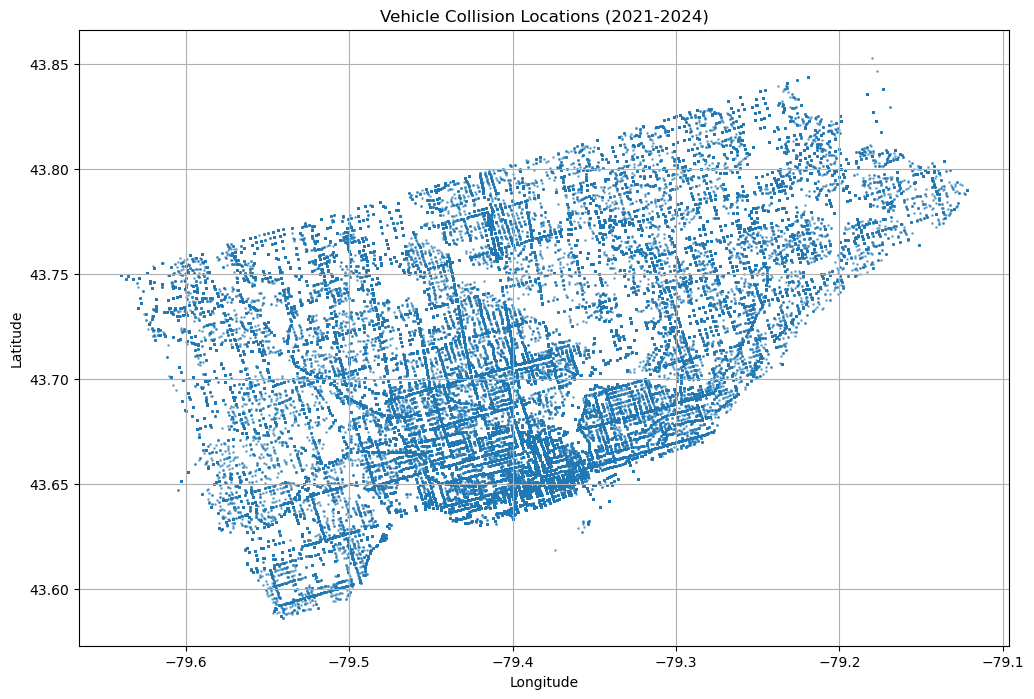

In [397]:
# Geographic scatterplot vehicle collisions from 2021-2024
# Import necessary Python libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Scatterplot
plt.figure(figsize=(12, 8))
plt.scatter(df_collisions['longitude'], df_collisions['latitude'], s=1, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Vehicle Collision Locations (2021-2024)')
plt.grid(True)
plt.show()


## Scatter Plot
This plot visualizes the geographic distribution of vehicle collisions across Toronto using raw latitude and longitude data. 

A noticeable grid-like pattern emerges, reflecting the city's urban layout, with dense clusters being particularly visible in the south-central region (i.e. Toronto's downtown core). These high-density clusters suggest increased collision risk in areas with high pedestrian and vehicle traffic, complex intersections, and narrow streets.

The linear patterns stretching horizontally and vertically throughout the plot correspond to major East-West and North-South arterial roads, such as Bloor Street, Dundas Street, Yonge Street, and Bathurst Street; all of which are critical routes that experience heavy traffic volumes.

Beyond identifying collision hot zones, this scatter plot highlights how Toronto's transportation infrastructure and urban planning shape traffic dynamics and risk concentration.

---
## TL;DR
Collisions are heavily concentrated in Toronto’s downtown core and along major East-West and North-South arterial roads, reflecting traffic volume and urban street layout.

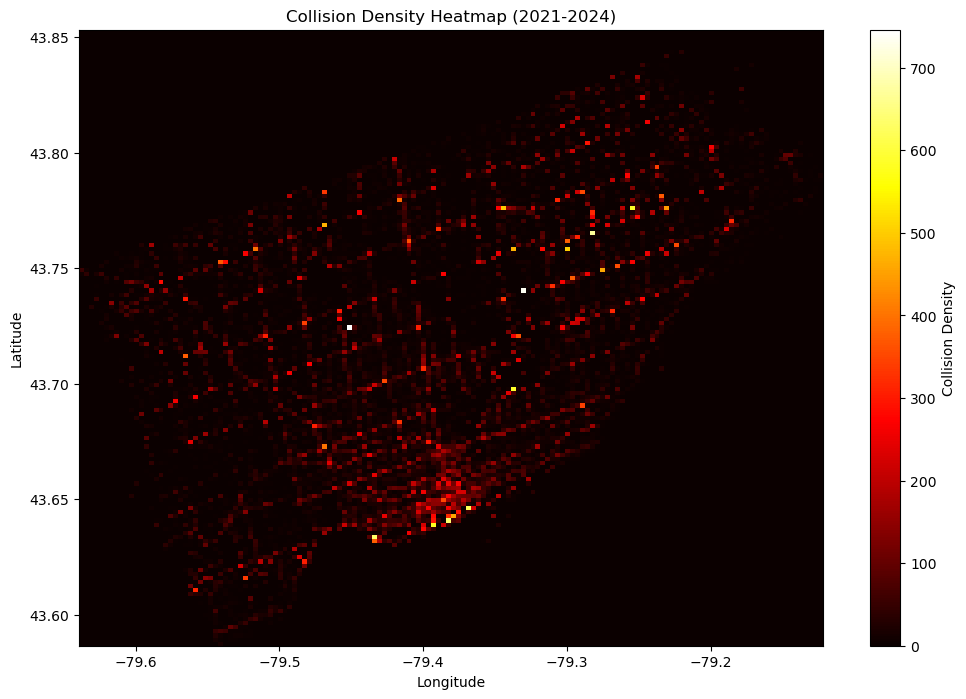

In [398]:
# Heatmap (2D Histogram) of collision density

plt.figure(figsize=(12, 8))
plt.hist2d(df_collisions['longitude'], df_collisions['latitude'], bins=150, cmap='hot') # or cmap = 'viridis'
plt.colorbar(label='Collision Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Collision Density Heatmap (2021-2024)')
plt.show()


## Heatmap
This visualization uses a heatmap to emphasize collision density. Brighter (hotter) regions represent areas with higher concentrations of reported collisions, allowing for quick identification of urban hotspots.

The downtown core again stands out, particularly near the Gardiner Expressway and major arterial roads like Bloor and Dundas. The heatmap improves on the scatter plot by better representing clustering intensity and revealing “micro-hotspots” that might otherwise be overlooked.

A closer inspection of the heatmap shows isolated high-intensity regions (highlighted as white or yellow grid cells) with some being over 700 collisions. These localized hotspots may reflect problematic infrastructure or consistently dangerous traffic conditions, warranting focussed safety interventions.

---
### TL;DR  
Hotspots appear near the Gardiner Expressway and central arteries, with some isolated localized zones experiencing 700+ collisions.


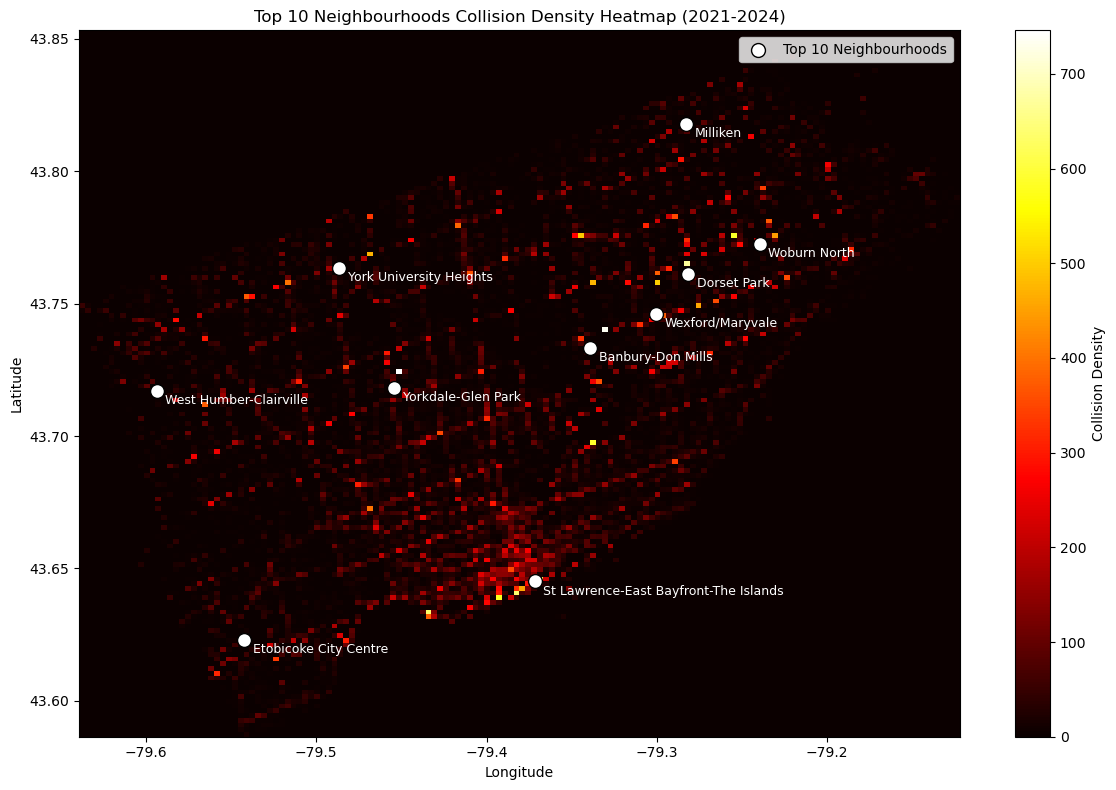

In [399]:
# Top 10 neighbourhoods by collision count
top_10_neigh = df_collisions['neighbourhood'].value_counts().head(10).index

# Filter data to just these 10 neighbourhoods
df_top = df_collisions[df_collisions['neighbourhood'].isin(top_10_neigh)].copy()

# Get average lat/lon for each of the top 10
top_10_coords = df_collisions[df_collisions['neighbourhood'].isin(top_10_neigh)].groupby('neighbourhood')[['latitude', 'longitude']].mean()

plt.figure(figsize=(12, 8))
plt.hist2d(df_collisions['longitude'], df_collisions['latitude'], bins=150, cmap='hot') # or cmap = 'viridis'
plt.colorbar(label='Collision Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Top 10 Neighbourhoods Collision Density Heatmap (2021-2024)')

# Overlay the top 10 points
plt.scatter(top_10_coords['longitude'], top_10_coords['latitude'], 
            color='white', edgecolor='black', s=100, marker='o', label='Top 10 Neighbourhoods')

# Add labels
for name, row in top_10_coords.iterrows():
    plt.text(row['longitude'] + 0.005, row['latitude'] - 0.005, name, fontsize=9, color='white', ha='left')

plt.legend()
plt.tight_layout()
plt.show()



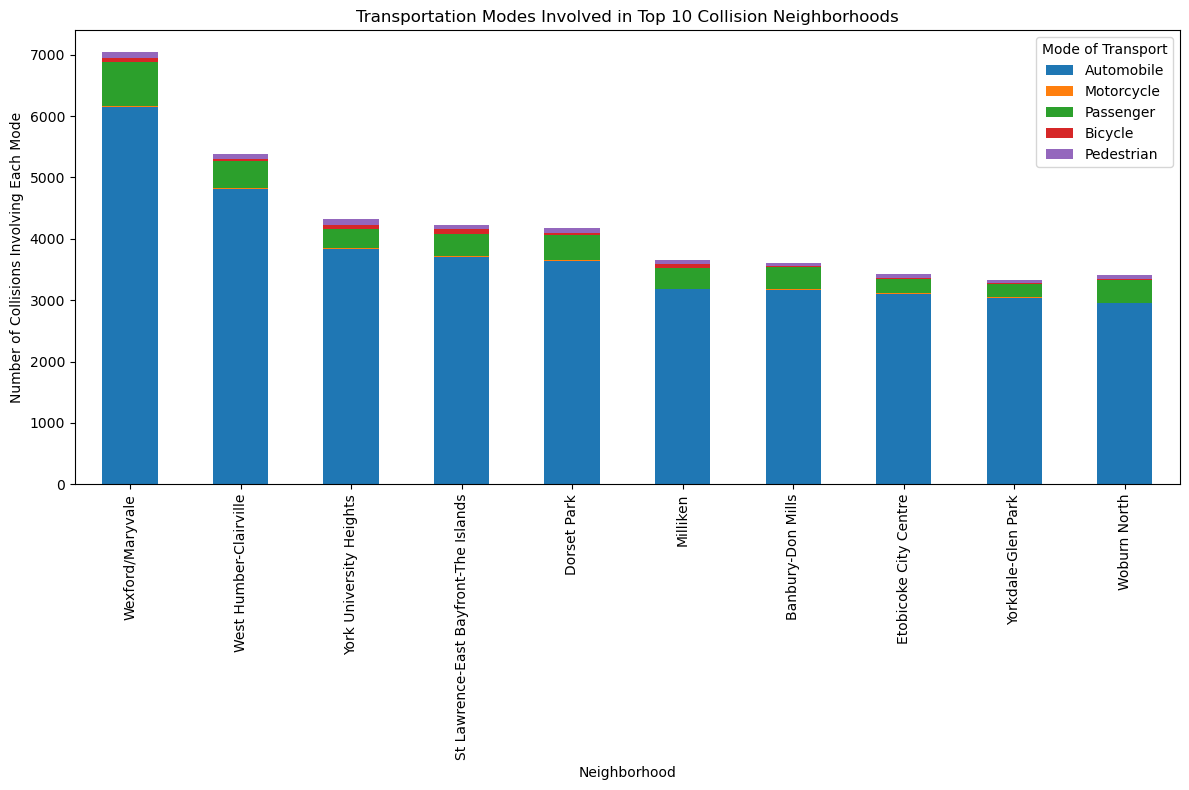

Top 10 Neighborhood Collision Breakdown (%)


neighbourhood,Wexford/Maryvale,West Humber-Clairville,York University Heights,St Lawrence-East Bayfront-The Islands,Dorset Park,Milliken,Banbury-Don Mills,Etobicoke City Centre,Woburn North,Yorkdale-Glen Park
Total Collisions,7045.00,5385.00,4318.00,4219.00,4169.00,3650.00,3605.00,3425.00,3403.00,3334.00
Average Daily Collisions,4.80,3.70,3.00,2.90,2.90,2.50,2.50,2.30,2.30,2.30
Automobile (%),87.17,89.34,88.63,87.65,87.38,86.96,87.85,90.34,86.69,91.24
Motorcycle (%),0.33,0.24,0.42,0.59,0.34,0.38,0.58,0.55,0.18,0.30
Passenger (%),10.16,8.10,7.46,8.32,9.88,9.21,9.82,6.83,10.81,6.24
Bicycle (%),0.88,0.63,1.32,1.87,0.55,1.86,0.55,0.44,0.56,0.57
Pedestrian (%),1.46,1.69,2.18,1.56,1.85,1.59,1.19,1.84,1.76,1.65


In [400]:
# Group and sum up YES values for mode of transportation columns 
mode_summary = df_top[df_top[mode_cols].eq('YES')].groupby(df_top['neighbourhood'])[mode_cols].apply(lambda x: (x == 'YES').sum())
mode_summary = mode_summary.loc[top_10_neigh]  # To keep the same order

# Normalize by total collisions for each neighbhourhood
neigh_counts = df_collisions['neighbourhood'].value_counts().loc[top_10_neigh]
mode_normalized = mode_summary.div(neigh_counts, axis=0)

mode_rename = {
    "involved_automobile": "Automobile",
    "involved_motorcycle": "Motorcycle",
    "involved_passenger": "Passenger",
    "involved_bicycle": "Bicycle",
    "involved_pedestrian": "Pedestrian"
}

mode_summary.rename(columns=mode_rename, inplace=True)

# Plot total counts: bar chart
mode_summary.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Transportation Modes Involved in Top 10 Collision Neighborhoods')
plt.ylabel('Number of Collisions Involving Each Mode')
plt.xlabel('Neighborhood')
plt.legend(title='Mode of Transport')
plt.tight_layout()
plt.show()

# Percentage breakdown output table
df_top_binary = df_top.copy()

# Convert YES/NO to binary (1/0)
for col in mode_cols:
    df_top_binary[col] = df_top_binary[col].map({'YES': 1, 'NO': 0})

# Group by neighbourhood and sum
mode_counts = df_top_binary.groupby('neighbourhood')[mode_cols].sum()

# Add total collisions per neighbourhood
mode_counts['Total_Collisions'] = mode_counts.sum(axis=1)

# Calculate percentage breakdown
percentage_breakdown = mode_counts[mode_cols].div(mode_counts['Total_Collisions'], axis=0) * 100
percentage_breakdown = percentage_breakdown.round(2)

# Calculate average daily collisions
total_days = 365 * 4
collisions_per_day = (mode_counts['Total_Collisions'] / total_days).round(1).sort_values(ascending=False)

# Convert to dataframe
avg_daily_df = collisions_per_day.to_frame()
avg_daily_df.columns = ['Average Daily Collisions']

# Concatenate total collisions and percentage breakdown
summary_table = pd.concat([mode_counts['Total_Collisions'], avg_daily_df, percentage_breakdown], axis=1)

# Sort the summary table by total collisions in descending order
summary_table = summary_table.sort_values(by='Total_Collisions', ascending=False)
transposed_summary = summary_table.T
transposed_summary.index = [
    "Total Collisions",
    "Average Daily Collisions",
    "Automobile (%)",
    "Motorcycle (%)",
    "Passenger (%)",
    "Bicycle (%)",
    "Pedestrian (%)"
]


# Display
print("Top 10 Neighborhood Collision Breakdown (%)")
transposed_summary



## Top 10 Neighbourhoods by Collision Count and Vehicle Type
The bar chart highlights the top ten neighbourhoods with the highest number of reported vehicle collisions between 2021 and 2024. Wexford/Maryvale, West Humber-Clairville, and York University Heights emerge as the top three high-risk zones.

Interestingly, many of these neighbourhoods are not located in the downtown core. Their presence in the top 10 may be due to wider roads, higher speed limits, or large intersections with poor visibility — highlighting that suburban areas also experience significant traffic risks.

Additionally, the table provides each neighbourhood's total collision count, average daily collisions and a percentage breakdown for the mode of transportation involved.

---
## TL;DR
Wexford/Maryvale and West Humber-Clairville lead the city in reported collisions — not all high-risk hotspot zones are downtown, but rather in suburban areas.



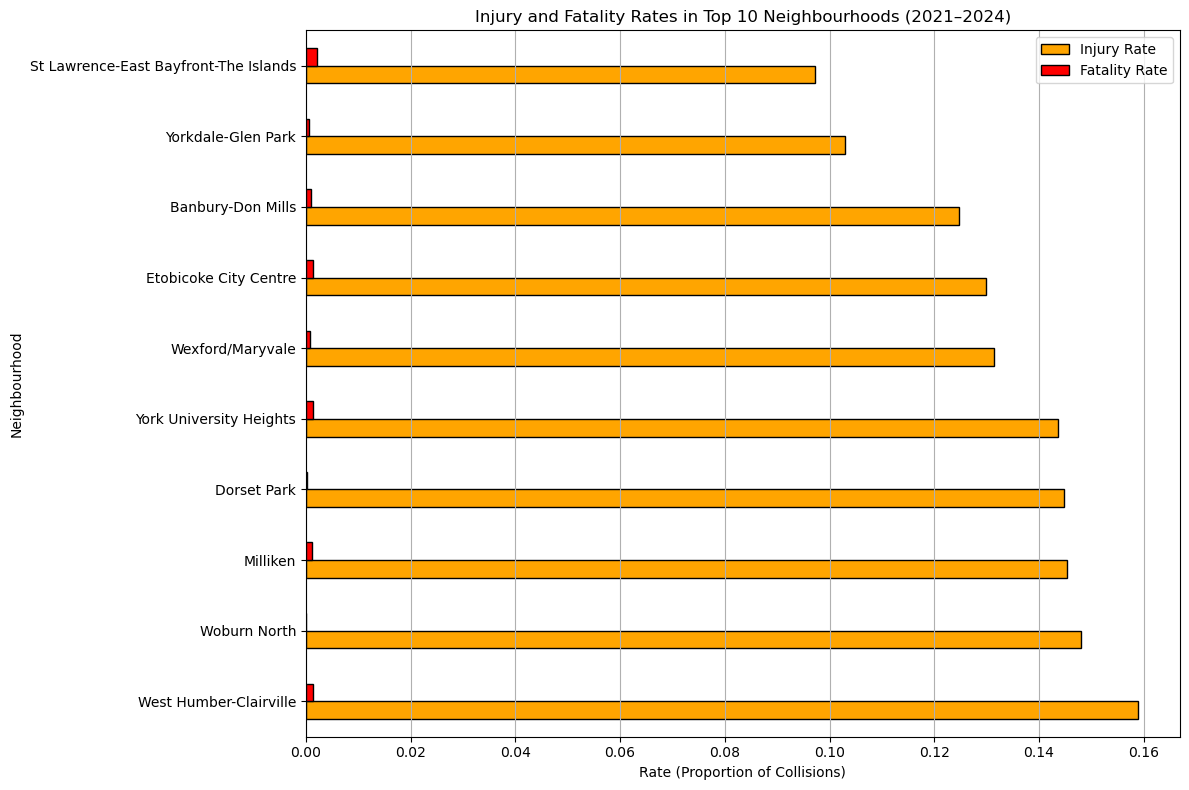

In [401]:
# Plot severity (Injuries vs Fatalities) in these top 10 neighbourhoods

# Aggregate injury vs fatality data
severity_df = df_top.groupby('neighbourhood').agg(
    total_collisions=('neighbourhood', 'count'), 
    injury_collisions=('injury_collision', lambda x: (x == 'YES').sum()),
    fatalities=('fatalities', 'sum'))

# Calculate normalized severity rates: # of injuries or fatalities / total collisions in that neighbourhood 
severity_df['injury_rate'] = severity_df['injury_collisions'] / severity_df['total_collisions']
severity_df['fatality_rate'] = severity_df['fatalities'] / severity_df['total_collisions']

# Sort by injury rate in descending order
severity_df_sorted = severity_df.sort_values(by='injury_rate', ascending=False)

# Plot bar chart
severity_df_sorted[['injury_rate', 'fatality_rate']].plot(
    kind='barh',
    figsize=(12, 8),
    color=['orange', 'red'],
    edgecolor='black'
)

plt.title('Injury and Fatality Rates in Top 10 Neighbourhoods (2021–2024)')
plt.ylabel('Neighbourhood')
plt.xlabel('Rate (Proportion of Collisions)')
plt.legend(['Injury Rate', 'Fatality Rate'])
plt.grid(axis='x')
plt.tight_layout()
plt.show()


## Severity-Weighted Collision Rates

To assess collision severity (not just frequency), this chart normalizes the number of injuries and fatalities by the total collisions in each neighbourhood. In other words, dividing the number of injuries and fatalities by the total collisions in each neighbourhood allows for a clearer understanding of which neighbourhoods have a higher proportion of serious outcomes per collision.

For example, Woburn North ranks 10th in total collisions but has the second-highest injury rate (~15%), 
marking it as one of the most dangerous neighbourhoods per incident.
In contrast, Wexford/Maryvale leads in collision count yet ranks only 5th in severity, suggesting that although collisions are more frequent, they are not as severe compared to other neighbourhoods.

This normalization helps prioritize areas that may not have frequent collisions but show a higher likelihood of severe outcomes — guiding more targeted interventions like signage improvements, traffic calming, or intersection redesigns.


# Temporal Analysis
To understand when vehicle collisions are most likely to occur, it is important to examine temporal patterns across multiple scales. This section begins with an analysis of city-wide trends, offering a broad view of how collision frequency varies by time of year, day of week, and hour of day.

However, not all neighbourhoods behave the same. Some areas may have elevated risk during rush hour, while others experience higher collision rates late at night or on weekends. To uncover these localized trends, we also perform temporal analyses on the top neighbourhoods identified in the spatial analysis.

By combining both **city-wide** and **neighbourhood-specific** temporal insights, we can:
- Identify consistent collision patterns across the city
- Detect unique or anomalous trends in specific neighbourhoods
- Provide better context for urban planning, road safety interventions, and resource allocation

This layered approach ensures that both general patterns and location-specific nuances are captured in the analysis.



## Overall Trends (City-Wide)

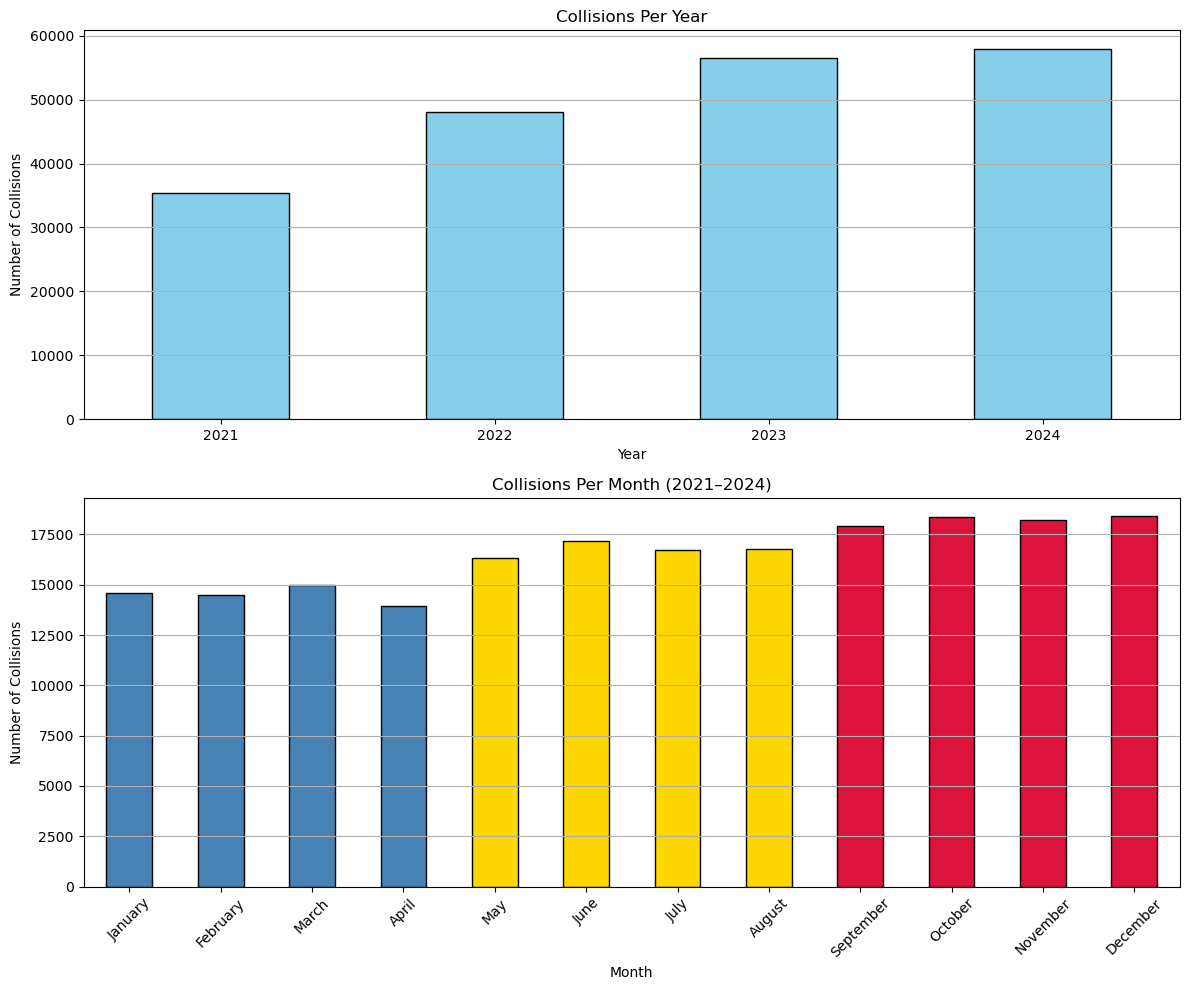

In [402]:
import calendar

# Make sure month is a proper ordered categorical variable
month_order = list(calendar.month_name[1:])  # January to December
df_collisions['occurrence_month'] = pd.Categorical(
    df_collisions['occurrence_month'],
    categories=month_order,
    ordered=True
)

# Prepare data
collisions_by_year = df_collisions['occurrence_year'].value_counts().sort_index()
collisions_by_month = df_collisions['occurrence_month'].value_counts().sort_index()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Yearly collisions
collisions_by_year.plot(
    kind='bar', ax=axes[0], color='skyblue', edgecolor='black'
)
axes[0].set_title('Collisions Per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Collisions')
axes[0].grid(axis='y')
axes[0].tick_params(axis='x', rotation=0)

# Assign colors by seasonal group
month_colors = [
    '#4682B4' if month in ['January', 'February', 'March', 'April']
    else '#FFD700' if month in ['May', 'June', 'July', 'August']
    else '#DC143C'
    for month in collisions_by_month.index
]

# Monthly collisions
collisions_by_month.plot(
    kind='bar', ax=axes[1], color=month_colors, edgecolor='black'
)

axes[1].set_title('Collisions Per Month (2021–2024)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Collisions')
axes[1].grid(axis='y')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



## City-Wide Collision Trends: Yearly and Monthly

### Collisions Per Year

The first plot shows the total number of reported vehicle collisions in Toronto from 2021 through 2024. There is a clear upward trend over the four-year period:

- **2021** starts relatively low, likely influenced by ongoing pandemic-related mobility restrictions.
- **2022** through **2024** show a sharp and sustained increase in collision frequency, with nearly **60,000 incidents** reported in 2024.

This growth emphasizes the need for a closer investigation into the underlying causes and potential mitigation strategies, particularly as the city continues to recover and grow post-pandemic.

### Collisions Per Month

The second plot aggregates collisions across all years by month to uncover seasonal patterns.

- **Fall and early winter** months (September through December) consistently show the **highest number of collisions**, with each month recording over 18,000 incidents.
- **Spring months** (March and April) tend to have the **lowest totals**, suggesting relatively safer conditions or lower traffic volumes.

The seasonal uptick in collisions during the latter part of the year could be attributed to factors such as reduced daylight, changing weather conditions, and increased traffic during holiday periods.

These city-wide trends provide valuable context for the more detailed neighbourhood-level and temporal breakdowns that follow.


### TL;DR
- Collisions in Toronto have increased sharply from 2021 to 2024.
- September to December are the most collision-heavy months.
- March and April consistently have the fewest collisions.


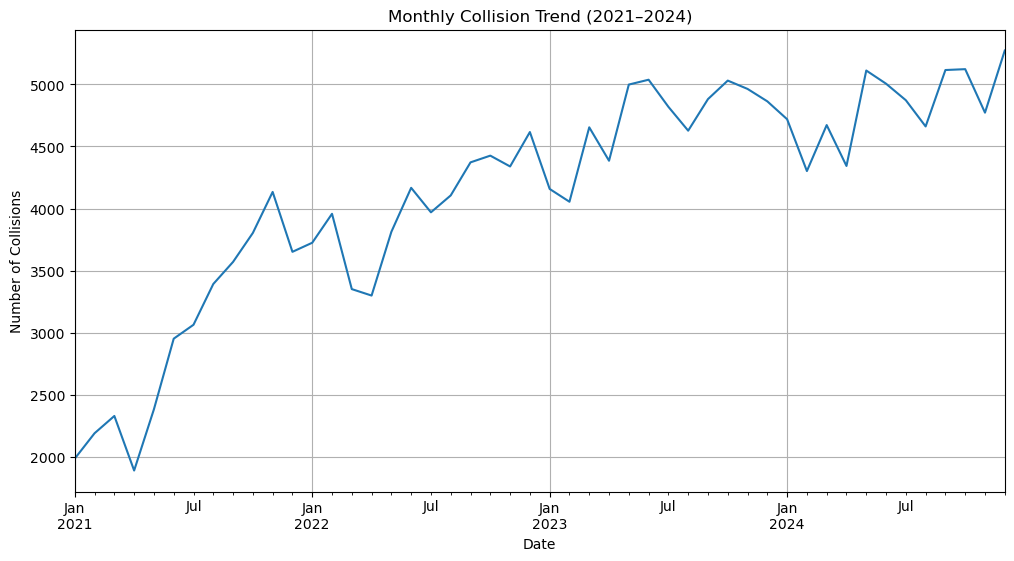

In [403]:
# Monthly line plot
monthly_trend = df_collisions.resample('ME', on='occurrence_date').size()
monthly_trend.plot(figsize=(12, 6))
plt.title('Monthly Collision Trend (2021–2024)')
plt.ylabel('Number of Collisions')
plt.xlabel('Date')
plt.grid(True)
plt.show()

### Monthly Collision Trend (2021–2024)

The third plot visualizes the **month-by-month progression** of reported vehicle collisions across Toronto from **January 2021 to December 2024**. Unlike the previous charts that show **total yearly or monthly aggregates**, this line chart captures the **temporal dynamics** of how collision numbers have evolved over time.

- **2021** begins with relatively low monthly counts (below 3,000), reflecting reduced mobility and pandemic-related disruptions.  
- **2022** marks the beginning of a sustained upward trend, with monthly totals exceeding 4,000 by mid-year.  
- **2023 and 2024** show persistent increases, with several months surpassing **5,000** collisions — and peaking at over **5,300** near the end of 2024.

This progressive increase may indicate not just population or traffic growth, but also points to broader urban planning, enforcement, and safety challenges that **worsen with time** if left unaddressed.

By observing the **line’s shape**, we also see **short-term fluctuations** — with minor dips and spikes — potentially corresponding to seasonal or event-based changes in driving behavior.

These insights help establish a temporal baseline, setting the stage for a **closer look at local neighbourhood trends** and policy implications.

---

### TL;DR
- Collision counts have **risen steadily each month** from 2021 to 2024.
- **Several months in 2023 and 2024** recorded **over 5,000 collisions**.
- The **month-by-month trend** reinforces the urgent need for city-wide collision mitigation strategies.
""")


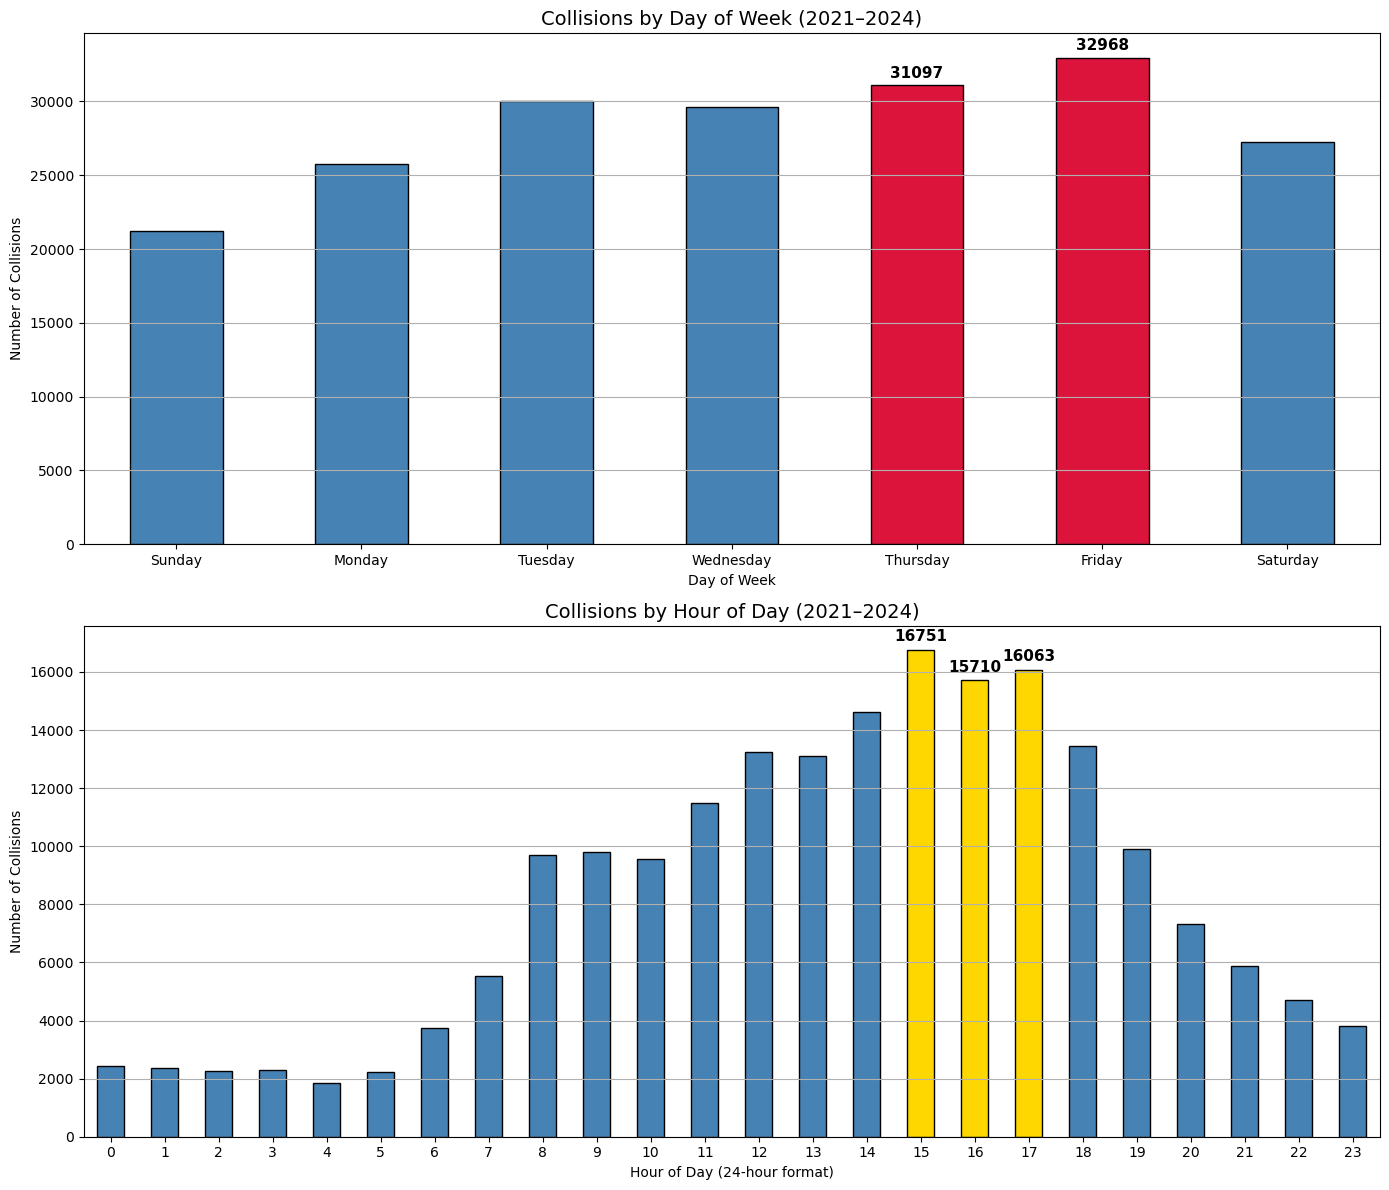

In [404]:
# Ensure ordered weekdays
weekday_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
df_collisions['day_of_week'] = pd.Categorical(
    df_collisions['day_of_week'],
    categories=weekday_order,
    ordered=True
)

# Prepare data
collisions_by_day = df_collisions['day_of_week'].value_counts().sort_index()
collisions_by_hour = df_collisions['occurrence_hour'].value_counts().sort_index()

# Define peak days and hours
peak_days = ['Thursday', 'Friday']
peak_hours = [15, 16, 17]

# Assign colors
base_day_colour = 'steelblue'
highlight_day_color = 'crimson'  # dark red
highlight_hour_color = 'gold' # gold

day_colors = [highlight_day_color if day in peak_days else base_day_colour for day in collisions_by_day.index]
hour_colors = [highlight_hour_color if hour in peak_hours else base_day_colour for hour in collisions_by_hour.index]

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Plot: Day of Week
collisions_by_day.plot(
    kind='bar', ax=ax1, color=day_colors, edgecolor='black'
)
ax1.set_title('Collisions by Day of Week (2021–2024)', fontsize=14)
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Number of Collisions')
ax1.tick_params(axis='x', rotation=0)
ax1.grid(axis='y')

# Annotate peak days
for idx, (day, count) in enumerate(collisions_by_day.items()):
    if day in peak_days:
        ax1.text(idx, count + 500, f"{count}", ha='center', fontsize=11, fontweight='bold', rotation=0)

# Plot: Hour of Day
collisions_by_hour.plot(
    kind='bar', ax=ax2, color=hour_colors, edgecolor='black'
)
ax2.set_title('Collisions by Hour of Day (2021–2024)', fontsize=14)
ax2.set_xlabel('Hour of Day (24‑hour format)')
ax2.set_ylabel('Number of Collisions')
ax2.set_xticks(range(0, 24))
ax2.tick_params(axis='x', rotation=0)
ax2.grid(axis='y')

# Annotate peak hours
for idx, (hour, count) in enumerate(collisions_by_hour.items()):
    if hour in peak_hours:
        ax2.text(idx, count + 300, f"{count}", ha='center', fontsize=11, fontweight='bold', rotation=0)
        
plt.tight_layout()
plt.show()




## City-Wide Collision Trends: Daily and Hourly

### Day of the Week
- **Thursday and Friday** stand out with the highest number of collisions, suggesting increased traffic volume or higher risk behavior closer to the weekend.
- Weekends (Saturday and Sunday) see fewer collisions, likely due to lower commuter traffic.

### Hour of the Day
- Peak collision times occur during **afternoon rush hour (3–5 PM)**, highlighted in yellow.
- This pattern reinforces the impact of **commute-related congestion** on collision risk.

> **Note:** Peak timeframes in both plots are color-coded to visually emphasize high-risk periods without the need for a legend.

---
### TL;DR
Collisions spike during weekday rush hours—especially Thursday & Friday (3–5 PM). Focus mitigation efforts on these peak windows.



## Localized Temporal Analysis by Neighbourhood

While city-wide trends help us understand general collision patterns across Toronto, they can obscure important local differences. Neighbourhoods may experience surges in collisions at different times of day or week due to unique factors like traffic volume, road design, land use (residential vs. commercial), and infrastructure quality.

To capture these localized nuances, we now shift focus to the **temporal dynamics within specific high-risk neighbourhoods** identified earlier in the spatial analysis.

### Key Questions:
- Do collision peak hours vary between neighbourhoods?
- Are certain neighbourhoods more prone to weekend or late-night incidents?
- Can we uncover unique trends that are masked in city-wide averages?

By breaking down collision data **by both time and neighbourhood**, we can identify hidden temporal patterns and offer more targeted insights for urban safety and resource allocation.



Based on the previous spatial and severity-weighted analyses, the following five neighbourhoods were selected for localized temporal analysis:

1. **Wexford/Maryvale** — 1st in total collisions  
2. **West Humber-Clairville** — 2nd in collisions, 1st in severity ratio  
3. **Woburn North** — 2nd highest severity ratio  
4. **York University Heights** — 3rd in collisions, 5th in severity  
5. **St. Lawrence- East Bayfront- The Islands** — 4th in collisions, but 10th (last) in severity ratio

### Why These 5 Neighbourhoods?

To ensure a meaningful and balanced analysis, these neighbourhoods were chosen using two key criteria:

- **Collision frequency**: High total number of reported incidents  
- **Severity ratio**: High (or low) rate of injury/fatality per collision  

This approach highlights a **diverse range of risk profiles**. For example, **St. Lawrence** shows a high volume of collisions but relatively low severity, while **West Humber-Clairville** ranks high in both volume and severity. Comparing these contrasting profiles can offer deeper insights into both risk intensity and incident dynamics across the city.



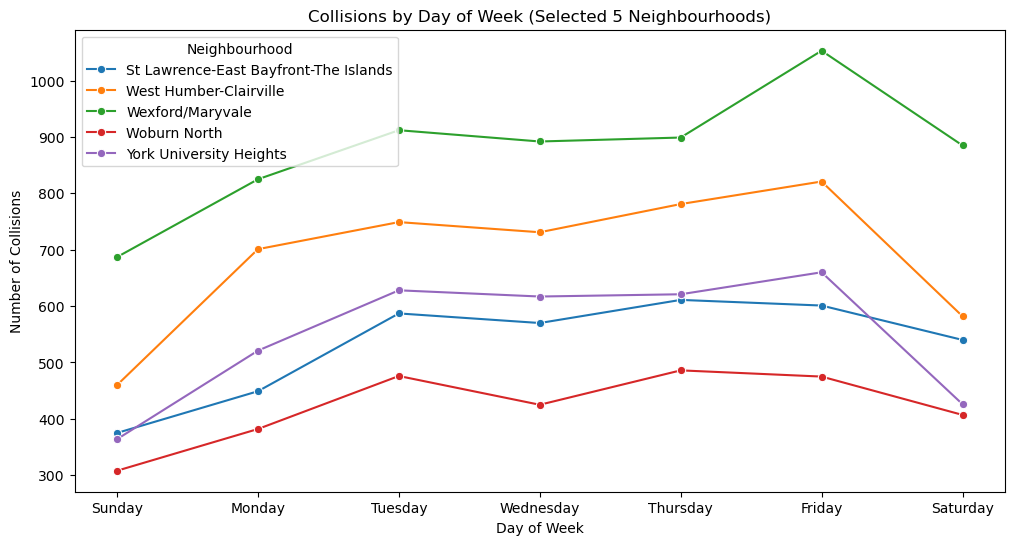

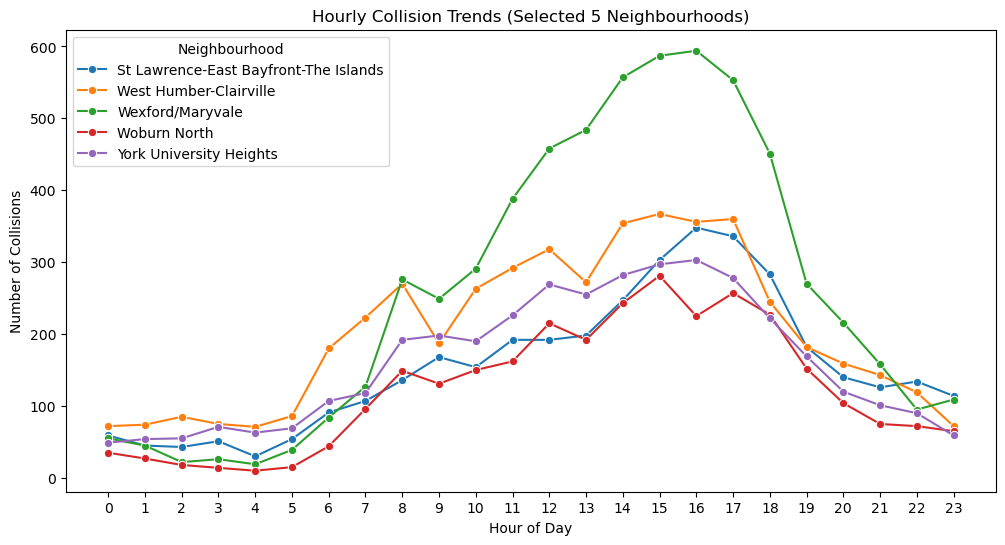

In [407]:
# 5 neighbourhoods
neigh_5 = ["Wexford/Maryvale",
    "West Humber-Clairville",
    "Woburn North",
    "York University Heights",
    "St Lawrence-East Bayfront-The Islands"]

# Filter data to just these 10 neighbourhoods
df_neigh_5 = df_collisions[df_collisions['neighbourhood'].isin(neigh_5)].copy()

# Day of week analysis
dow_counts = df_neigh_5.groupby(['neighbourhood', 'day_of_week'], observed=False).size().reset_index(name='count')

# Hourly analysis
hour_counts = df_neigh_5.groupby(['neighbourhood', 'occurrence_hour']).size().reset_index(name = 'count')

# Barplot for Day of Week
plt.figure(figsize=(12, 6))
sns.lineplot(data=dow_counts, x="day_of_week", y="count", hue="neighbourhood", marker = 'o')
plt.title("Collisions by Day of Week (Selected 5 Neighbourhoods)")
plt.xlabel("Day of Week")
plt.ylabel("Number of Collisions")
plt.legend(title="Neighbourhood")
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_counts, x="occurrence_hour", y="count", hue="neighbourhood", marker="o")
plt.title("Hourly Collision Trends (Selected 5 Neighbourhoods)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Collisions")
plt.xticks(range(0, 24))
plt.legend(title="Neighbourhood")
plt.show()


## Temporal Patterns Across Selected Neighbourhoods

The following two plots visualize temporal trends for the top five high-risk neighbourhoods, focusing on:
- **Day of the week**
- **Hour of the day**

These visualizations help uncover localized risk windows, informing when and where traffic safety measures could be most effective.

---

### Collisions by Day of the Week
The line plot below reveals that most neighbourhoods experience a mid-to-late week surge in collisions.

- **Wexford/Maryvale** consistently ranks highest across all days, peaking sharply on **Friday**, likely due to commuter buildup and end-of-week activity.
- **West Humber-Clairville** mirrors this pattern but with slightly flatter weekday peaks.
- **York University Heights** maintains a steadier distribution throughout the week, with its highest volume on **Friday** and lowest on **Sunday**.
- **St. Lawrence-East Bayfront-The Islands**, located in the downtown core, shows a relatively even spread across weekdays and weekends — possibly due to consistent tourist and pedestrian activity.
- **Woburn North**, while lower in total collisions, still shows a mid-week peak on **Tuesday** and **Thursday**, with slightly reduced weekend activity.

---

### Collisions by Hour of the Day
The second line plot breaks down collisions by hour, providing insight into rush-hour dynamics.

- All five neighbourhoods share a common pattern of **rising collision frequency from 7 AM**, peaking between **2 PM and 5 PM** — aligning with afternoon rush hour.
- **Wexford/Maryvale** stands out with a dramatic peak in the late afternoon, reaching nearly **600 collisions around 4 PM** — far above the others.
- **West Humber-Clairville** and **York University Heights** show more evenly distributed afternoon peaks between **2 PM and 5 PM**.
- **St. Lawrence** again maintains a smoother curve, with less fluctuation — consistent with its mixed-use urban layout and pedestrian-heavy streets.
- **Woburn North** has a noticeably flatter hourly profile, indicating a more evenly spread risk throughout the day.

---

### Interpretation:
These trends highlight the importance of **customized intervention strategies**. For example:
- **Wexford/Maryvale** may benefit from enhanced enforcement or signage around weekday afternoons.
- **St. Lawrence** may require more pedestrian-focused safety features that remain effective even during off-peak hours.
- **York University Heights** shows student-driven traffic rhythms that could inform school-hour safety policies.

By zooming in on the **“when” and “where”** of high-risk patterns, this neighbourhood-specific analysis deepens the city-wide findings and provides groundwork for data-driven urban safety planning.


## Conclusion

This analysis explored the spatial and temporal patterns of vehicle collisions in Toronto from 2021 to 2024 using publicly available police data. Key findings include:

- A sharp increase in total collisions over the four-year span, particularly from 2022 onward.
- Seasonal peaks in the fall and winter months, and daily spikes during weekday afternoon rush hours.
- The downtown core and several suburban neighbourhoods emerged as consistent collision hotspots.
- Neighbourhood-specific temporal analysis revealed unique risk profiles — emphasizing that safety interventions should be localized and time-aware rather than city-wide and static.

By layering together both **when** and **where** collisions occur, this project lays the foundation for a more comprehensive understanding of traffic safety dynamics in Toronto.

### Next Steps

In the next phase of this series, I will integrate **weather data** to examine how factors such as rain, snow, visibility, and temperature influence collision rates across time and space. By combining meteorological and traffic datasets, the goal is to build a more predictive understanding of high-risk conditions and support proactive urban planning and road safety policy.

---

*This is the first notebook in a larger exploration of urban mobility, safety, and risk in Toronto.*
